In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df['sex'] = df['sex'].replace(1,'Male')
df['sex'] = df['sex'].replace(0,'Female')

In [7]:
df['exang'] = df['exang'].replace(1,'Yes')
df['exang'] = df['exang'].replace(0,'No')

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

-0.2024633654856539


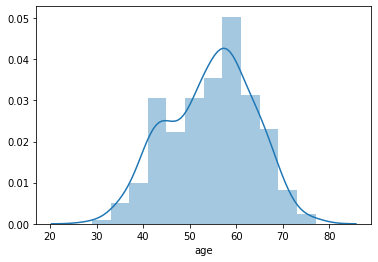

In [9]:
sns.distplot(df['age'])
print(df['age'].skew())

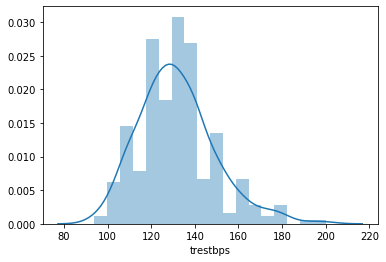

In [10]:
sns.distplot(df['trestbps'])

In [11]:
df['trestbps'].mean()

131.62376237623764

In [12]:
df['trestbps'].median()

130.0

In [13]:
df['trestbps'].mode()

0    120
dtype: int64

In [14]:
for i in df['trestbps']:
    if (i<120):
        df['trestbps']=df['trestbps'].replace(i,'Low')
    elif (i>=120 and i<=140):
        df['trestbps']=df['trestbps'].replace(i,'Medium')
    else:
        df['trestbps']=df['trestbps'].replace(i,'High')

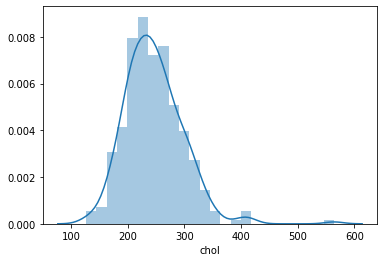

In [15]:
sns.distplot(df['chol'])

In [16]:
df['chol'].mean()

246.26402640264027

In [17]:
for i in df['chol']:
    if (i<200):
        df['chol']=df['chol'].replace(i,'Low')
    elif (i>=200 and i<=246):
        df['chol']=df['chol'].replace(i,'Normal')
    else:
        df['chol']=df['chol'].replace(i,'High')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null int64
trestbps    303 non-null object
chol        303 non-null object
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 33.2+ KB


In [19]:
df=pd.get_dummies(df,drop_first=True)

In [20]:
df.columns

Index(['age', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca',
       'thal', 'target', 'sex_Male', 'trestbps_Low', 'trestbps_Medium',
       'chol_Low', 'chol_Normal', 'exang_Yes'],
      dtype='object')

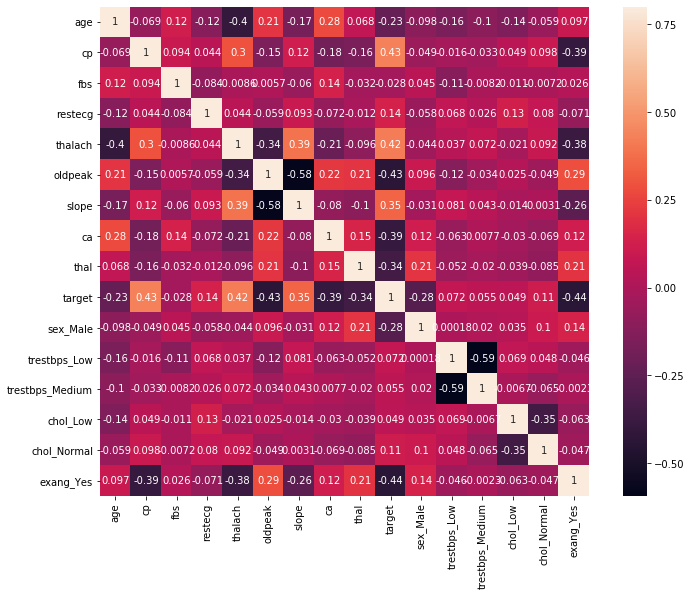

In [21]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

In [22]:
X=df[['age', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca',
       'thal','sex_Male', 'trestbps_Low', 'trestbps_Medium',
       'chol_Low', 'chol_Normal', 'exang_Yes']]
y=df[['target']]
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [23]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=50, max_depth=1,learning_rate =0.1)
classifier.fit(X_train , y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
y_pred=classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.8524590163934426